29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 641ms/step - loss: 2987.4148
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 647ms/step - loss: 2986.5481


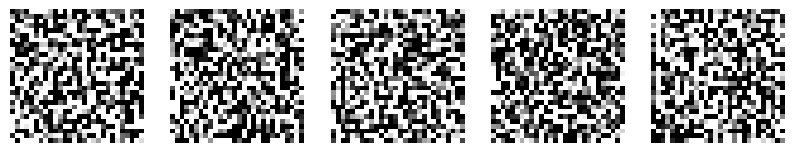

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import tensorflow_probability as tfp

# Defining the TensorFlow Probability Distributions
tfd = tfp.distributions

# Loading and Preprocessing the Data (I am using only 1000 samples to increase)
(x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train[:1000]
x_train = np.expand_dims(x_train, axis=-1).astype(np.int32)

# Defining PixelCNN Distribution
dist = tfd.PixelCNN(
    image_shape=(28, 28, 1),
    num_resnet=2,
    num_hierarchies=1,
    num_filters=32,
    num_logistic_mix=3,
)

# The Input Layer
image_input = layers.Input(shape=(28, 28, 1), dtype=tf.int32)

# Computing Log Probability
log_prob_layer = layers.Lambda(lambda x: dist.log_prob(tf.cast(x, tf.float32)))(image_input)

# Defining the Model
pixelcnn = models.Model(inputs=image_input, outputs=log_prob_layer)

# Compiling the Model
pixelcnn.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=lambda y_true, y_pred: -tf.reduce_mean(y_pred))

# Training Model
pixelcnn.fit(x_train, np.zeros((x_train.shape[0], 1)), batch_size=32, epochs=2, verbose=1)

# Generating Few Images
generated_images = dist.sample(5).numpy()

# Displaying the output
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(generated_images[i].squeeze(), cmap='gray')
    ax.axis('off')
plt.show()


This result from training would show that the PixelCNN model was set up and ran just fine, but with one important warning: "The model does not have any trainable weights." What this really means is that here, the TensorFlow Probability PixelCNN distribution has been used as a fixed probabilistic model, not as a learnable neural network. This is probably because, even though the model computed log probabilities and pretended to train, the model itself isn't updating any of its parameters; hence, there is minimal change in the loss values across epochs. Therefore, the approach should be changed to incorporate at least a convolutional layer to learn meaningful dependencies in the images before computing a probability distribution over them.